In [2]:
# import libraries

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import IPython

In [3]:
# data load

y_m, sr_m = librosa.load(
    'c:/nmb/nmb_data/주형.wav'
) # 남자 음성
y_f, sr_f = librosa.load(
    'c:/nmb/nmb_data/영리cut.wav'
) # 여자 음성

ipd.Audio(y_m, rate = sr_m)
IPython.display.Audio(y_f, rate = sr_f)

In [4]:
print(y_m)
print(y_f)

[-0.00061035 -0.00085449 -0.00064087 ... -0.01144409 -0.01119995
 -0.01251221]
[-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]


In [5]:
sm_m = librosa.feature.stack_memory(
    y_m,
    n_steps = 3,
    delay = 1,
    mode = 'edge'
)

sm_f = librosa.feature.stack_memory(
    y_f,
    n_steps = 3,
    delay = 1,
    mode = 'reflect'
)

print('sm_m :\n ', sm_m)
print('sm_f :\n ', sm_f)

sm_m :
  [[-0.00061035 -0.00085449 -0.00064087 ... -0.01144409 -0.01119995
  -0.01251221]
 [-0.00061035 -0.00061035 -0.00085449 ... -0.01101685 -0.01144409
  -0.01119995]
 [-0.00061035 -0.00061035 -0.00061035 ... -0.01251221 -0.01101685
  -0.01144409]]
sm_f :
  [[-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
  -1.2165480e-03 -4.3098307e-03]
 [-7.4235257e-05 -2.9244100e-05 -7.4235257e-05 ...  3.8842263e-04
   6.2298583e-04 -1.2165480e-03]
 [-9.4395844e-05 -7.4235257e-05 -2.9244100e-05 ... -1.0224323e-03
   3.8842263e-04  6.2298583e-04]]


In [6]:
print(sm_m.shape)
print(sm_f.shape)

(3, 110250)
(3, 110250)


In [7]:
y_m, sr_m = librosa.load(librosa.ex('choice'))
chroma = librosa.feature.chroma_stft(y=y_m, sr=sr_m)
tempo, beats = librosa.beat.beat_track(y=y_m, sr=sr_m, hop_length=512)
beats = librosa.util.fix_frames(beats, x_min=0, x_max=chroma.shape[1])
chroma_sync = librosa.util.sync(chroma, beats)
chroma_lag = librosa.feature.stack_memory(chroma_sync, n_steps=5)

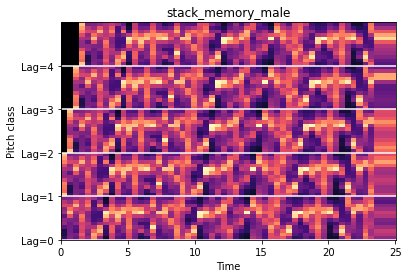

In [8]:
fig, ax = plt.subplots()
beat_times = librosa.frames_to_time(beats, sr=sr_m, hop_length=512)
librosa.display.specshow(chroma_lag, y_axis='chroma', x_axis='time',
                         x_coords=beat_times, ax=ax)
ax.set(yticks=[0, 12, 24, 36, 48], yticklabels=['Lag=0', 'Lag=1', 'Lag=2', 'Lag=3', 'Lag=4'],
          title='stack_memory_male')
ax.hlines([0, 12, 24, 36, 48], beat_times.min(), beat_times.max(), color='w')

C:\Users\ai\Anaconda3\envs\tf_cert\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\ai\Anaconda3\envs\tf_cert\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\ai\Anaconda3\envs\tf_cert\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


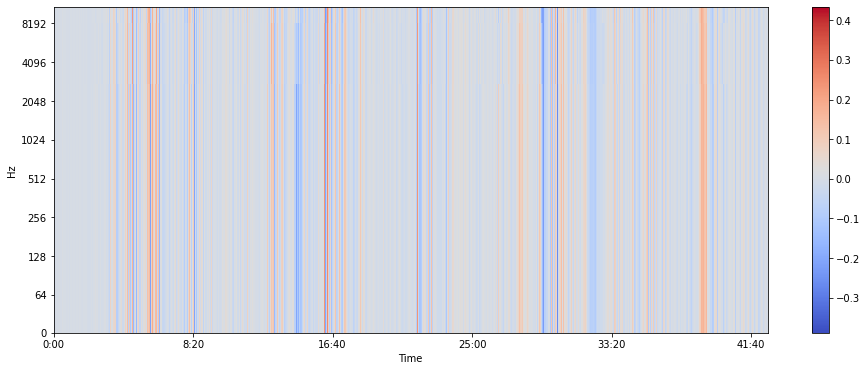

In [9]:
plt.figure(figsize = (16, 6))
librosa.display.specshow(
    sm_m,
    y_axis = 'log',
    x_axis = 'time'
)
plt.colorbar()
plt.show()